## Shakespeare's Comedies and Tragedies. Comparison

In this notebook, we will compare our data on Shakespeare's comedies and Iarkhoo's data on Shakespeare's tragedies. 

We will sub-divide Shakespeare's plays into two periods:
- before 1600 (1592 - 1599)
- starting 1600 (1600 - 1610).

We will compare the two genres based on the following features in each of the above-mentioned periods:
- Speech distribution;
- The standard range of the number of speaking characters (sigma);
- The percentage of non-dialogues;
- The percentage of polylogues;
- The percentage of monologues;
- The number of dramatic characters;
- The mobility coefficient.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def determine_period(row):
    if row < 1600:
        period = 1
    else:
        period = 2
    
    return period

In [3]:
def make_list(row):
    speech_dist = []
    for value in row[1:-1].split('\n '):
        speech_dist.append([int(num) for num in re.findall('[0-9]+', value)])
        
    return speech_dist

In [4]:
def speech_distribution_by_author(author_df):
    all_distributions = []
    for row in author_df['speech_distribution']:
        speech_dist_df = pd.DataFrame(row).T
        # rename columns to make sure they start with 1 and not 0
        speech_dist_df.columns = speech_dist_df.iloc[0, :]
        # no need to include the variants as a row - they will be column names
        only_counts_df = pd.DataFrame(speech_dist_df.iloc[1, :])
        only_counts_df.columns = ['raw_numbers']
        only_counts_df['percentage'] = only_counts_df['raw_numbers'] / only_counts_df.sum().values[0]
        all_distributions.append(round(only_counts_df['percentage'], 4))
    period_df_dist = pd.concat(all_distributions, axis=1).fillna(0)
    # take the mean for each period
    mean_per_type = pd.DataFrame(period_df_dist.mean(axis=1)).T 
    mean_per_type.index.name = 'number_of_speakers'
    mean_per_type.index = ['percentage_of_scenes']
    mean_per_type = (mean_per_type * 100).round(2)
        
    return mean_per_type

In [5]:
def sigma_iarkho(df):
    """
    The function allows calculating standard range following iarkho's procedure.
    Parameters:
        df  - a dataframe where columns are variants, i.e., the distinct number of speakers in the ascending order, 
              e.g. [1, 2, 3, 4, 5] and values weights corresponding to these variants, i.e.,
              the number of scenes, e.g. [20, 32, 18, 9, 1]
    Returns:
        sigma - standard range per iarkho
    """
    weighted_mean_variants = np.average(df.columns.tolist(), weights=df.values[0])
    differences_squared = [(variant - weighted_mean_variants)**2 for variant in df.columns]
    weighted_mean_difference = np.average(differences_squared, weights=df.values[0])
    sigma = round(weighted_mean_difference**0.5, 2)

    return sigma

In [6]:
contr_data_df = pd.read_csv('../Contrastive_Material/Contrastive_Material_Data.csv')

In [7]:
contr_data_df['speech_distribution'] = contr_data_df['speech_distribution'].apply(make_list)

In [8]:
# sort by date
sorted_contr_data_df = contr_data_df.sort_values(by='date')

In [9]:
sorted_contr_data_df  = sorted_contr_data_df.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                           'percentage_non_duologues': 'percentage_non_dialogues',
                                                           'percentage_above_two_speakers': 'percentage_polylogues',
                                                            'percentage_scenes_with_discontinuous_change_characters': 
                                                            'discontinuous_scenes'
                                                            })


In [10]:
shakespeare_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Shakespeare'].copy()

In [11]:
shakespeare_df['date'] = shakespeare_df['date'].astype('int')

In [12]:
shakespeare_df['period'] = shakespeare_df['date'].apply(determine_period)

### Get Data For Tragedies

In [13]:
plays = ['Troilus and Cressida', 
         'Coriolanus', 
         'Titus Andronicus', 
         'Romeo and Juliet', 
         'Timon of Athens',
         'Julius Caesar', 
         'Macbeth', 
         'Hamlet', 
         'King Lear', 
         'Othello']

shakespeare_tragedies = pd.DataFrame(plays, columns=['title'])
shakespeare_tragedies = pd.concat([shakespeare_tragedies, pd.DataFrame(np.zeros((10, 10)))], axis=1)

# # this data comes from Iarkho's article table VIII (page 571)
shakespeare_tragedies['speech_distribution'] = [[(1, 34), (2, 45), (3, 23), (4, 13), (5, 5), (6, 0), (7, 0),
                                                (8, 1), (9, 0), (10, 1)],
                                               [(1, 12), (2, 38), (3, 30), (4, 10), (5, 7), (6, 2), (7, 2),
                                                (8, 1), (9, 0), (10, 0)],
                                               [(1, 16), (2, 19), (3, 21), (4, 9), (5, 2), (6, 2), (7, 0),
                                                (8, 0), (9, 0), (10, 0)],
                                               [(1, 22), (2, 54), (3, 18), (4, 7), (5, 3), (6, 0), (7, 0),
                                                (8, 0), (9, 0), (10, 0)],
                                               [(1, 15), (2, 31), (3, 19), (4, 11), (5, 3), (6, 2), (7, 2),
                                                (8, 1), (9, 0), (10, 0)],
                                               [(1, 14), (2, 29), (3, 16), (4, 10), (5, 5), (6, 1), (7, 2),
                                                (8, 0), (9, 0), (10, 0)],
                                               [(1, 21), (2, 40), (3, 18), (4, 9), (5, 3), (6, 1), (7, 1),
                                                (8, 0), (9, 0), (10, 0)],
                                               [(1, 21), (2, 51), (3, 25), (4, 4), (5, 2), (6, 3), (7, 0),
                                                (8, 0), (9, 0), (10, 0)],
                                               [(1, 13), (2, 48), (3, 26), (4, 12), (5, 5), (6, 1), (7, 0),
                                                (8, 0), (9, 0), (10, 0)],
                                               [(1, 17), (2, 43), (3, 24), (4, 11), (5, 4), (6, 0), (7, 0),
                                                (8, 0), (9, 0), (10, 0)]]
shakespeare_tragedies['date'] = [1602, 1608, 1592, 1597, 1606, 1599, 1606, 1603, 1606, 1604]
# # this data comes from Dracor
shakespeare_tragedies['num_present_characters'] = [34, 67, 27, 38, 68, 51, 45, 38, 33, 28]
# # this data comes from Iarkho's article table VIII (page 571)
shakespeare_tragedies['mobility_coefficient'] = [122, 102, 69, 104, 83, 78, 93, 106, 105, 99]
shakespeare_tragedies['percentage_monologues'] = [28, 12, 23, 21, 18, 18, 23, 20, 12, 17]
shakespeare_tragedies['percentage_non_dialogues'] = [63, 63, 72, 48, 63, 62, 57, 52, 54, 57]
shakespeare_tragedies['percentage_polylogues'] = [35, 51, 49, 27, 45, 44, 34, 32, 42, 39]
shakespeare_tragedies = shakespeare_tragedies.sort_values(by='date')

shakespeare_tragedies['period'] = shakespeare_tragedies['date'].apply(determine_period)

In [14]:
shakespeare_tragedies.date.max()

1608

### Speech Distribution in Shakespeare's Comedies and Tragedies

#### Speech Distribution in Shakespeare's Comedies Before 1600

In [15]:
speech_dist_shakespeare_per_one = speech_distribution_by_author(
                                  shakespeare_df[shakespeare_df.period == 1])
display(speech_dist_shakespeare_per_one)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_shakespeare_per_one), 2))

,1,2,3,4,5,6,7,8,9,10
percentage_of_scenes,23.85,36.92,19.87,9.75,4.58,3.36,0.42,0.23,0.74,0.27


The standard range of the number of speaking characters: 1.49


In [16]:
round(np.sum(speech_dist_shakespeare_per_one.iloc[:, 6:].values), 2)

1.66

#### Speech Distribution in Shakespeare's Comedies After 1600

In [17]:
speech_dist_shakespeare_per_two = speech_distribution_by_author(
                                  shakespeare_df[shakespeare_df.period == 2])
display(speech_dist_shakespeare_per_two)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_shakespeare_per_two ), 2))

,0,1,2,3,4,5,6,7,8,11
percentage_of_scenes,0.86,23.14,40.09,20.96,10.12,3.08,0.84,0.2,0.54,0.19


The standard range of the number of speaking characters: 1.25


In [18]:
round(np.sum(speech_dist_shakespeare_per_two.iloc[:, 7:].values), 2)

0.93

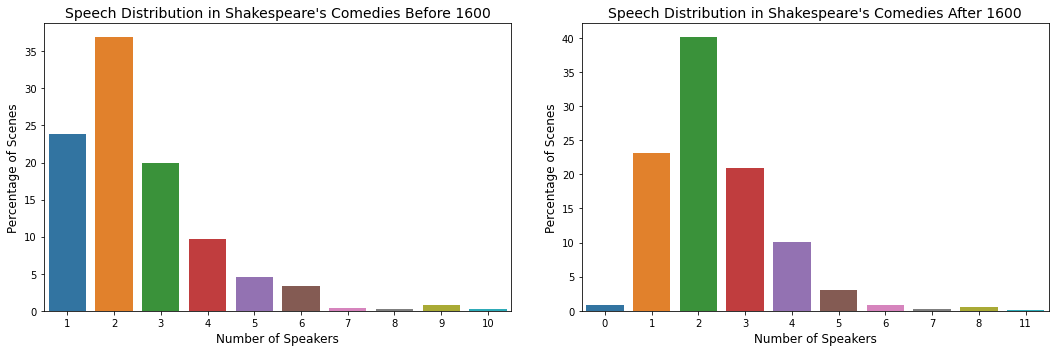

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Speech Distribution in Shakespeare\'s Comedies Before 1600', fontsize=14)
sns.barplot(x=speech_dist_shakespeare_per_one.columns.tolist(), 
            y=speech_dist_shakespeare_per_one.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)

plt.subplot(122)
plt.title('Speech Distribution in Shakespeare\'s Comedies After 1600', fontsize=14)
sns.barplot(x=speech_dist_shakespeare_per_two.columns.tolist(), 
            y=speech_dist_shakespeare_per_two.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)
plt.tight_layout()
plt.show()

#### Speech Distribution in Shakespeare's Tragedies Before 1600

In [20]:
speech_dist_shakespeare_tr_per_one = speech_distribution_by_author(
                                  shakespeare_tragedies[shakespeare_tragedies.period == 1])
display(speech_dist_shakespeare_tr_per_one)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_shakespeare_tr_per_one), 2))

,1,2,3,4,5,6,7,8,9,10
percentage_of_scenes,20.84,39.04,22.84,10.92,4.09,1.4,0.87,0.0,0.0,0.0


The standard range of the number of speaking characters: 1.21


In [21]:
round(np.sum(speech_dist_shakespeare_tr_per_one.iloc[:, 6:].values), 2)

0.87

In [22]:
speech_dist_shakespeare_tr_per_two = speech_distribution_by_author(
                                  shakespeare_tragedies[shakespeare_tragedies.period == 2])
display(speech_dist_shakespeare_tr_per_two)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_shakespeare_tr_per_two), 2))

,1,2,3,4,5,6,7,8,9,10
percentage_of_scenes,18.49,41.61,23.26,9.94,4.06,1.31,0.77,0.43,0.0,0.12


The standard range of the number of speaking characters: 1.25


In [23]:
round(np.sum(speech_dist_shakespeare_tr_per_two.iloc[:, 6:].values), 2)

1.32

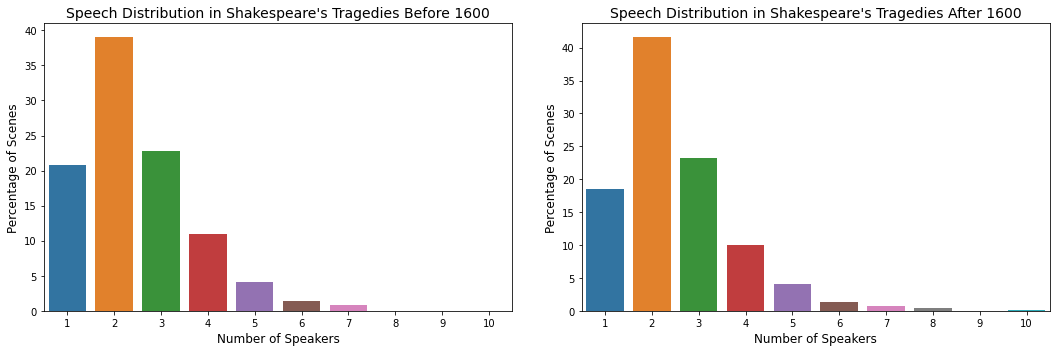

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Speech Distribution in Shakespeare\'s Tragedies Before 1600', fontsize=14)
sns.barplot(x=speech_dist_shakespeare_tr_per_one.columns.tolist(), 
            y=speech_dist_shakespeare_tr_per_one.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)

plt.subplot(122)
plt.title('Speech Distribution in Shakespeare\'s Tragedies After 1600', fontsize=14)
sns.barplot(x=speech_dist_shakespeare_tr_per_two.columns.tolist(), 
            y=speech_dist_shakespeare_tr_per_two.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)
plt.tight_layout()
plt.show()

### Summary:

The maximum number of speakers in Shakespeare's comedies before 1600 was 10, whereas in his comedies starting in 1600 was 11. Before 1600, 1.66% of scenes had over six speakers, whereas starting in 1600, 0.93% of scenes had over six speakers. The standard range of the number of speaking characters decreased from 1.49 to 1.25. Comedies starting with 1600 had scenes with no speakers.

The maximum number of speakers in Shakespeare's tragedies before 1600 and starting in 1600 it was also 10. The standard range in his comedies before 1600 was lower than that in his comedies of that period (1.21 vs. 1.49). The standard range in his tragedies starting in 1600 was the same as the standard range in the comedies of this period (1.25). Yet, the maximum number of speakers in comedies was 11 vs. 10 in tragedies of that period. In his tragedies before 1600, 0.87% of scenes had over six speakers (cf. 1.66% in the comedies of that time). After 1600, 1.32% of the scenes had over six speakers (cf. 0.93% in comedies).

### The Percentage of Non-Dialogues

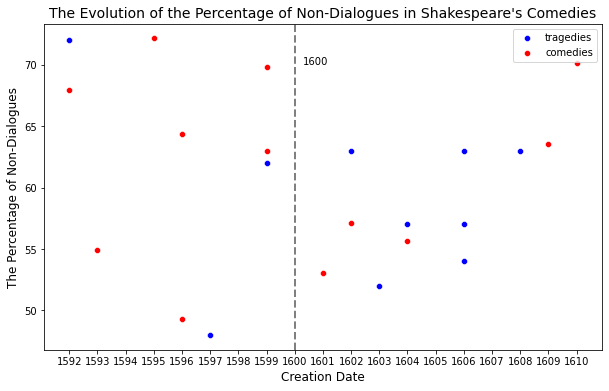

In [25]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Percentage of Non-Dialogues in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot(x='date', 
                y='percentage_non_dialogues', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot(x='date', y='percentage_non_dialogues', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Non-Dialogues', fontsize=12)
plt.axvline(1600, color='grey',linestyle='dashed', linewidth=2)
plt.text(1600.3, 70, '1600')
plt.legend(loc='best')
plt.show()

In [26]:
shakespeare_df.groupby('period').describe().loc[:, 'percentage_non_dialogues'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,63.08,8.25,64.37,49.33,72.13
2,59.91,6.90,57.14,53.06,70.15


In [27]:
shakespeare_tragedies.groupby('period').describe().loc[:, 'percentage_non_dialogues'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,60.67,12.06,62.0,48.0,72.0
2,58.43,4.61,57.0,52.0,63.0


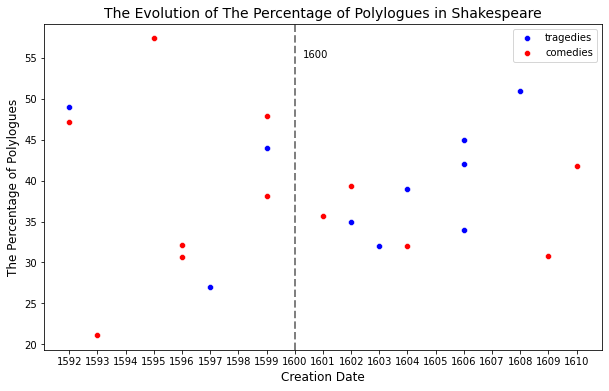

In [28]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Polylogues in Shakespeare', fontsize=14)
sns.scatterplot(x='date', 
                y='percentage_polylogues', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot(x='date', 
                y='percentage_polylogues', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Polylogues', fontsize=12)
plt.axvline(1600, color='grey',linestyle='dashed', linewidth=2)
plt.text(1600.3, 55, '1600')
plt.legend(loc='best')
plt.show()

In [29]:
shakespeare_df.groupby('period').describe().loc[:, 'percentage_polylogues'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,39.23,12.39,38.10,21.13,57.38
2,35.92,4.67,35.71,30.84,41.79


In [30]:
shakespeare_tragedies.groupby('period').describe().loc[:, 'percentage_polylogues'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,40.00,11.53,44.0,27.0,49.0
2,39.71,6.78,39.0,32.0,51.0


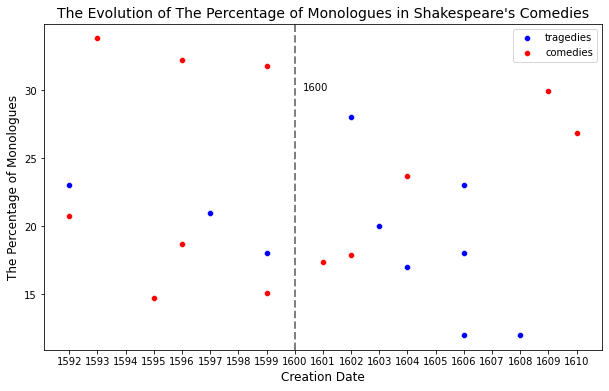

In [31]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Monologues in Shakespeare\'s Comedies', fontsize=14)
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])

sns.scatterplot(x='date', 
                y='percentage_monologues', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot(x='date', 
                y='percentage_monologues', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Monologues', fontsize=12)
plt.axvline(1600, color='grey',linestyle='dashed', linewidth=2)
plt.text(1600.3, 30, '1600')
plt.legend(loc='best')
plt.show()

In [32]:
shakespeare_df.groupby('period').describe().loc[:, 'percentage_monologues'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,23.85,8.44,20.75,14.75,33.80
2,23.14,5.51,23.71,17.35,29.91


In [33]:
shakespeare_tragedies.groupby('period').describe().loc[:, 'percentage_monologues'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,20.67,2.52,21.0,18.0,23.0
2,18.57,5.77,18.0,12.0,28.0


## The Number of Dramatic Characters

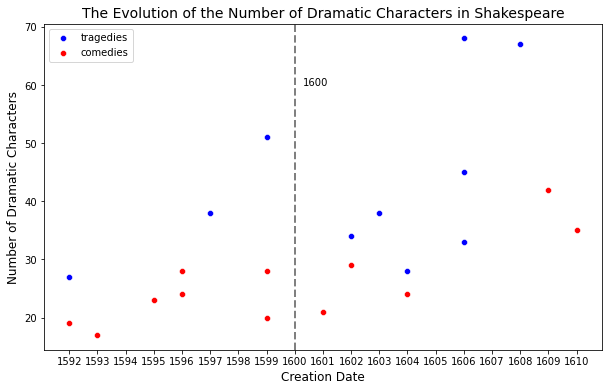

In [34]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Number of Dramatic Characters in Shakespeare', fontsize=14)
sns.scatterplot(x='date', 
                y='num_present_characters', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')

sns.scatterplot(x='date', 
                y='num_present_characters', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Number of Dramatic Characters', fontsize=12)
plt.axvline(1600, color='grey',linestyle='dashed', linewidth=2)
plt.text(1600.3, 60, '1600')
plt.legend()
plt.show()

In [35]:
shakespeare_df.groupby('period').describe().loc[:, 'num_present_characters'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,22.71,4.31,23.0,17.0,28.0
2,30.20,8.47,29.0,21.0,42.0


In [36]:
shakespeare_tragedies.groupby('period').describe().loc[:, 'num_present_characters'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,38.67,12.01,38.0,27.0,51.0
2,44.71,16.41,38.0,28.0,68.0


### The Mobility Coefficient

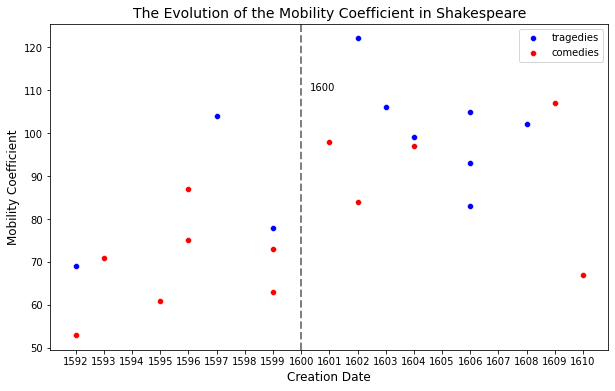

In [37]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Mobility Coefficient in Shakespeare', fontsize=14)
sns.scatterplot(x='date', 
                y='mobility_coefficient', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot(x='date', y='mobility_coefficient', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])

plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Mobility Coefficient', fontsize=12)
plt.axvline(1600, color='grey',linestyle='dashed', linewidth=2)
plt.text(1600.3, 110, '1600')
plt.legend()
plt.show()

In [38]:
shakespeare_df.groupby('period').describe().loc[:, 'mobility_coefficient'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,69.0,11.08,71.0,53.0,87.0
2,90.6,15.53,97.0,67.0,107.0


In [39]:
shakespeare_tragedies.groupby('period').describe().loc[:, 'mobility_coefficient'][['mean', 'std', '50%','min', 'max']].round(2)

,mean,std,50%,min,max
period,,,,,
1,83.67,18.18,78.0,69.0,104.0
2,101.43,12.07,102.0,83.0,122.0


### Summary:
1. The percentage of non-dialogues in Shakespeare's comedies before 1600 was 63.08%, starting in 1600, it decreased to 59.91%; the percentage of non-dialogues in Shakespeare's tragedies before 1600 was 60.67%, starting in 1600, it decreased to 58.43%. The percentage of non-dialogues was larger in comedies in both periods. It decreased over time in both genres.
2. The percentage of polylogues in Shakespeare's comedies before 1600 was 39.23%; after 1600, it decreased to 35.92%. In his tragedies before 1600, it was 40%, afterward, it decreased to 39.71%. The percentage of polylogues was generally higher in Shakespeare's tragedies than in his comedies in every period. The average slightly decreased in both genres.
3. Surprisingly, the average percentage of monologues was tended to be higher in comedies than in tragedies in every period. In both genres, the average percentage of monologues decreased over time (in tragedies from 20.67% to 18.57%, in comedies, from 23.85% to 23.14%).
4. The mean number of dramatic characters increased in both genres. In comedy, it increased from 22.71 to 30.20, in tragedy, from 38.67 to 44.71. The mean number of dramatic characters was higher in tragedies in every period.
5. The mobility coefficient increased in both comedies and tragedies. In comedies, from 69 to 90.6, in tragedies from 83.67 to 101.43. The mobility coefficient tended to be higher in tragedies.
6. Out of the examined features, only two (the number of dramatic characters and the mobility coefficient) evolved: they were gradually increasing in both genres. This trend was evident before and after 1600. Other features did not reveal such a gradual increase.